In [234]:
## checking if any cognitive score  makes sense

In [235]:
import scipy.io
import mat73
import pandas as pd
import numpy as np
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC as svm
from sklearn.linear_model import LogisticRegression as lg
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import confusion_matrix,accuracy_score,balanced_accuracy_score,f1_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.exceptions import ConvergenceWarning
from warnings import simplefilter,filterwarnings

# ignore all future warnings1
simplefilter(action='ignore', category=FutureWarning)

import os

DATA_DIR = ''
if 'google.colab' not in str(get_ipython()):
    if "anuja" in os.environ.get('USER'):
        DATA_DIR = 'data/'
    #elif "martyna" in os.environv.get('USER'):
    #    DATA_DIR = '/home/ubuntu/Martyna/repo/AI4Health/'

In [236]:
#Martyna  
DATA_DIR = '/home/ubuntu/Martyna/repo/AI4Health/DATAfoof/'

## EEG data and foof:

In [237]:
## data loading
data = scipy.io.loadmat(DATA_DIR+'x.mat')  
foof = pd.read_csv(DATA_DIR+"sensor_intercept_slope.csv")
foof

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,IDs
0,1.610769,1.793923,1.639958,1.803579,1.622763,1.867163,1.596286,1.868653,1.459489,1.880624,...,1.637747,1.472414,1.775967,1.534612,1.803604,1.575800,1.869977,0.986272,1.825774,NDARAA075AMK
1,1.572269,1.762184,1.615888,1.938907,1.515331,1.878222,1.577389,1.888830,1.645799,1.892993,...,1.698141,1.698537,1.854421,1.486611,1.755794,1.517099,1.845983,1.486650,1.888544,NDARAA112DMH
2,1.414507,1.818785,1.504383,1.902537,1.563395,1.936381,1.554663,2.085351,1.566065,2.106747,...,1.847331,1.417519,1.869143,1.323095,1.838333,1.496008,1.895424,1.593155,2.095749,NDARAA117NEJ
3,0.561062,1.068994,0.333554,0.991180,0.555779,1.304169,0.665864,1.491464,0.524828,1.573271,...,1.464311,0.576556,1.265274,0.199181,0.863242,0.246682,1.010393,0.703331,1.724831,NDARAA947ZG5
4,1.262007,1.901401,1.305927,1.924721,1.293914,1.924840,1.226456,1.947274,0.818595,1.905113,...,1.859064,1.158560,1.863190,1.173287,1.773532,1.252168,1.878925,0.918020,1.749441,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,0.648706,1.508826,0.591809,1.640814,0.640782,1.665891,0.455759,1.679019,0.866016,1.786340,...,1.536850,0.528776,1.478037,0.466827,1.767683,0.570274,1.664126,1.351549,1.996940,NDARZN277NR6
2038,1.332278,1.729382,1.387863,1.788208,1.452167,1.841329,1.524229,1.976239,1.480653,2.022584,...,1.876485,1.214977,1.795080,1.456392,1.835807,1.399127,1.795906,1.380795,2.036327,NDARZN578YDP
2039,0.746123,1.324138,0.653335,1.285734,0.564490,1.271931,0.375903,1.245331,0.258508,1.206112,...,1.307891,0.691917,1.310004,0.604437,1.283587,0.564744,1.273098,0.339229,1.050644,NDARZN610GTY
2040,0.976055,1.441830,0.823197,1.407064,0.879368,1.464799,0.902699,1.512205,1.012450,1.505105,...,1.341166,0.598687,1.282644,0.697733,1.421177,0.753861,1.457204,0.781225,1.470061,NDARZN677EYE


In [238]:
# flattening
df = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))
df = np.array(df)
df = df.reshape(data['x'].shape)
df.shape

(2042, 105, 79)

In [239]:
df = pd.DataFrame(df.reshape((df.shape[0], -1)))
df['IDs'] = foof['IDs']
df

,0,1,2,3,4,5,6,7,8,9,...,8286,8287,8288,8289,8290,8291,8292,8293,8294,IDs
0,7.707834e-12,1.512286e-10,2.475735e-09,3.453763e-08,4.554996e-07,0.000007,0.000109,0.001314,0.009992,0.045200,...,2.990881e-09,1.223086e-09,4.893694e-10,1.915752e-10,7.337775e-11,2.749867e-11,1.008282e-11,3.617107e-12,1.269651e-12,NDARAA075AMK
1,3.798713e-02,1.639433e-01,2.897591e-01,2.097609e-01,6.347556e-02,0.027758,0.105298,0.184513,0.130638,0.163258,...,5.835291e-06,1.856717e-06,5.922864e-07,1.928109e-07,6.449918e-08,2.204650e-08,7.598678e-09,2.604260e-09,8.780452e-10,NDARAA112DMH
2,2.104310e-06,4.299647e-05,5.644195e-04,4.760137e-03,2.579253e-02,0.089799,0.201005,0.290260,0.276177,0.196151,...,1.332064e-07,5.270957e-08,2.026971e-08,7.575282e-09,2.751336e-09,9.711398e-10,3.331297e-10,1.110552e-10,3.597966e-11,NDARAA117NEJ
3,1.692639e-01,2.021357e-01,2.273063e-01,2.406964e-01,2.400039e-01,0.225430,0.202278,0.198154,0.228356,0.181836,...,8.323825e-02,7.759521e-02,7.183415e-02,6.604061e-02,6.029416e-02,5.466678e-02,4.922161e-02,4.401211e-02,3.908162e-02,NDARAA947ZG5
4,8.332328e-06,1.552379e-04,1.804338e-03,1.287033e-02,5.615280e-02,0.149809,0.244887,0.247738,0.163687,0.094061,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,8.241315e-06,2.938160e-04,4.641777e-03,3.249546e-02,1.008094e-01,0.138615,0.084707,0.024339,0.009157,0.021386,...,5.852474e-03,4.262113e-03,3.068545e-03,2.184048e-03,1.536788e-03,1.069025e-03,7.351630e-04,4.998062e-04,3.359246e-04,NDARZN277NR6
2038,8.113400e-03,1.005675e-02,1.237930e-02,1.513279e-02,1.837070e-02,0.022147,0.026515,0.031525,0.037230,0.043721,...,5.855173e-04,3.933072e-04,2.601868e-04,1.695084e-04,1.087534e-04,6.871244e-05,4.275280e-05,2.619553e-05,1.580597e-05,NDARZN578YDP
2039,5.472767e-03,8.816325e-03,1.629356e-02,3.226822e-02,6.212373e-02,0.108594,0.166461,0.220594,0.252412,0.252807,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARZN610GTY
2040,2.658455e-03,5.749806e-03,1.180538e-02,2.300961e-02,4.257369e-02,0.074778,0.124685,0.197358,0.296551,0.423009,...,3.676327e-04,1.925477e-04,9.805386e-05,4.855040e-05,2.337344e-05,1.094093e-05,4.979521e-06,2.203549e-06,9.481114e-07,NDARZN677EYE


## Behavioral Data:


In [240]:
behaviour_data = pd.read_csv(DATA_DIR+'AllData.csv')
behaviour_data = behaviour_data.rename(columns = {'EID': 'IDs'}, inplace = False)
behaviour_data.columns

Index(['IDs', 'SRS_SCI_T', 'SRS_RRB_T', 'SWAN_IN_Avg', 'SWAN_HY_Avg',
       'SWAN_Avg', 'SCARED_SR_GD', 'SCARED_P_GD', 'WISC_WMI_Sum',
       'WISC_VCI_Sum'],
      dtype='object')

In [241]:
behaviour_data = behaviour_data[['IDs', 'SRS_SCI_T', 'SRS_RRB_T', 'SWAN_IN_Avg', 'SWAN_HY_Avg',
 'SCARED_P_GD', 'WISC_WMI_Sum',
       'WISC_VCI_Sum']]
behaviour_data.shape

(2579, 8)

## Merge EEG and foof data together:

In [242]:
df = pd.merge(df, foof, on='IDs', how='inner')
df.shape

(2042, 8506)

## and then with the behaviorals

In [243]:
df = pd.merge(df, behaviour_data, on='IDs', how='inner')
df.shape

(1465, 8513)

## features and labels preparation:

In [244]:
#removing NaNs
df = df.dropna()
df.shape

(1075, 8513)

In [245]:
#labels_list = ['WISC_VCI_Sum']#gowno
#labels_list = ['WISC_WMI_Sum']#gowno
#labels_list = ['SWAN_HY_Avg'] #ok
#labels_list = ['SWAN_IN_Avg'] #ok
#labels_list = [ 'SRS_SCI_T'] #ok
labels_list = ['SCARED_P_GD'] #gowno so soo
#labels_list = [ 'SRS_RRB_T'] #ok
X = df[df.columns.difference(['IDs']+labels_list)]
print(X.shape)

(1075, 8511)


In [246]:
X = np.asarray(X)


In [247]:
X = X[:,:-6]  #remove all other colummns that contain the beh info

In [248]:
Y = df[labels_list]
print(Y.shape)
print(X.shape)

(1075, 1)
(1075, 8505)


In [249]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# scaling y
#norm = preprocessing.StandardScaler().fit(Y)
#Y = norm.transform(Y)
# scaling x
#norm = preprocessing.MinMaxScaler().fit(X)
#X = norm.transform(X)



scaler = StandardScaler()
print(scaler.fit(X))
X = scaler.transform(X)

scaler = MinMaxScaler()
print(scaler.fit(Y))
Y = scaler.transform(Y)


StandardScaler()
MinMaxScaler()


## Split and PCA



In [250]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, shuffle=True)

In [251]:
pca = PCA()
print('Applying PCA...')
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)
print(xtrain.shape, xtest.shape)


Applying PCA...
(806, 806) (269, 806)


In [252]:
Y = Y.squeeze()
Y.shape
ytest = np.asarray(ytest)
ytrain = np.asarray(ytrain)


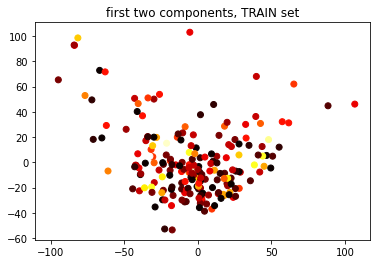

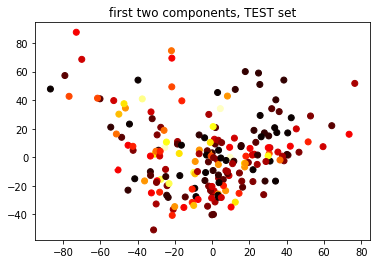

In [253]:
import matplotlib.pyplot as plt
plt.scatter(xtrain[:200,1], xtrain[:200,2], c=((ytrain[:200]+3)/6)*255.0, cmap = 'hot')
plt.title('first two components, TRAIN set')
plt.show()


import matplotlib.pyplot as plt
plt.scatter(xtest[:200,1], xtest[:200,2], c=((ytest[:200]+3)/6)*255.0, cmap = 'hot')
plt.title('first two components, TEST set')
plt.show()

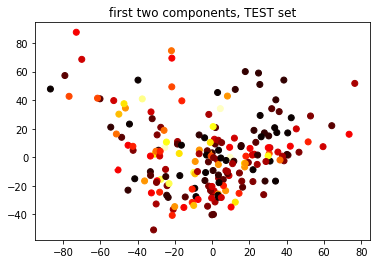

In [254]:
import matplotlib.pyplot as plt
plt.scatter(xtest[:200,1], xtest[:200,2], c=((ytest[:200]+3)/6)*255.0, cmap = 'hot')
plt.title('first two components, TEST set')
plt.show()

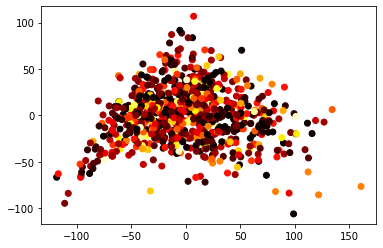

In [255]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(xtest)
plot = plt.scatter(xtrain[:,0], xtrain[:,1], c=((ytrain+3)/6)*255.0, cmap = 'hot')
plt.show()  

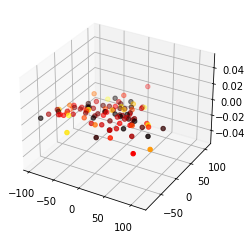

In [256]:
fig = plt.figure()  
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:100,0], xtrain[:100,1], c=((ytrain[:100]+3)/6)*255.0, cmap = 'hot')
plt.show()

## DUMMY BASELINES

### dummy regressors (to obtain the random baseline):

In [257]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error


lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(xtrain, ytrain)
lm_dummy_median = DummyRegressor(strategy = 'median').fit(xtrain, ytrain)
ypred_dummy_mean = lm_dummy_mean.predict(xtest)
ypred_dummy_median = lm_dummy_median.predict(xtest)


print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(ytest,
																	ypred_dummy_mean)))


print("Mean absolute error (dummy): {:.2f}".format(mean_absolute_error(ytest,
																	ypred_dummy_mean)))

print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(ytest,
																	ypred_dummy_median)))

print("r2_score (dummy mean): {:.2f}".format(r2_score(ytest, ypred_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(ytest, ypred_dummy_median)))

#print(ytest[:10])
#print(ytest.mean())

Mean squared error (dummy): 0.05
Mean absolute error (dummy): 0.18
Median absolute error (dummy): 0.17
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.02


# MODELLING

In [258]:
xtrain = pd.DataFrame(xtrain)

## random forest

In [259]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=7)
# fit the model on the whole dataset
rf.fit(xtrain.values, ytrain)
ypred = rf.predict(xtest)

print("Mean squared error (raandfor): {:.2f}".format(mean_squared_error(ytest,
																	ypred)))
print("Mean absolute error (randfor): {:.2f}".format(mean_absolute_error(ytest,
																	ypred)))																	
print("R2 score (randfor): {:.2f}".format(rf.score(xtest, ytest)))


/tmp/ipykernel_1829420/331493250.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain.values, ytrain)


Mean squared error (raandfor): 0.06
Mean absolute error (randfor): 0.20
R2 score (randfor): -0.19


## elastic net

In [260]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(random_state=0)
regr.fit(xtrain, ytrain)
# Generate predictions for testing data
ypred = regr.predict(xtest)


print("Mean squared error (elastic): {:.2f}".format(mean_squared_error(ytest,
																	ypred)))
print("Mean absolute error (elastic): {:.2f}".format(mean_absolute_error(ytest,
																	ypred)))																	
print("R2 score (elastic): {:.2f}".format(regr.score(xtest, ytest)))


Mean squared error (elastic): 0.05
Mean absolute error (elastic): 0.18
R2 score (elastic): -0.00


## robust regression

In [261]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
		max_trials=4, 		# Number of Iterations
		min_samples=2, 		# Minimum size of the sample
		loss='absolute_loss', 	# Metrics for loss
		residual_threshold=10 	# Threshold
		)

# Train model
ransac.fit(xtrain, ytrain)
# Generate predictions for testing data
ypred = ransac.predict(xtest)

print("Mean squared error (ransac)): {:.2f}".format(mean_squared_error(ytest,
																	ypred)))
print("Mean absolute error (ransac): {:.2f}".format(mean_absolute_error(ytest,
																	ypred)))																	
print("R2 score (ransac): {:.2f}".format(ransac.score(xtest, ytest)))


Mean squared error (ransac)): 0.14
Mean absolute error (ransac): 0.30
R2 score (ransac): -1.90


## SVR regressor

In [262]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create the SVR regressor
svr = SVR(epsilon=0.1)
#Create the Multioutput Regressor
mor = MultiOutputRegressor(svr)
# Train the regressor
mor = mor.fit(xtrain, ytrain)
# Generate predictions for testing data
ypred = mor.predict(xtest)
print("Mean squared error (svr): {:.2f}".format(mean_squared_error(ytest,
																	ypred)))
print("Mean absolute error (svr): {:.2f}".format(mean_absolute_error(ytest,
																	ypred)))																	
print("R2 score (svr): {:.2f}".format(mor.score(xtest, ytest)))


Mean squared error (svr): 0.06
Mean absolute error (svr): 0.20
R2 score (svr): -0.20
